[Rice (Cammeo and Osmancik)](https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik)

A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 

# data (as pandas dataframes) 
X = rice_cammeo_and_osmancik.data.features 
y = rice_cammeo_and_osmancik.data.targets 
  
# metadata 
print(rice_cammeo_and_osmancik.metadata) 
  
# variable information 
print(rice_cammeo_and_osmancik.variables) 

{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'published_in': 'International Journal of Intelligent System

In [8]:
df = pd.DataFrame(X, columns=rice_cammeo_and_osmancik.variables.name)

In [10]:
df.rename(columns={'name':'index'}, inplace=True)

In [12]:
df['Class'] = y

In [15]:
df

name,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.3+ KB


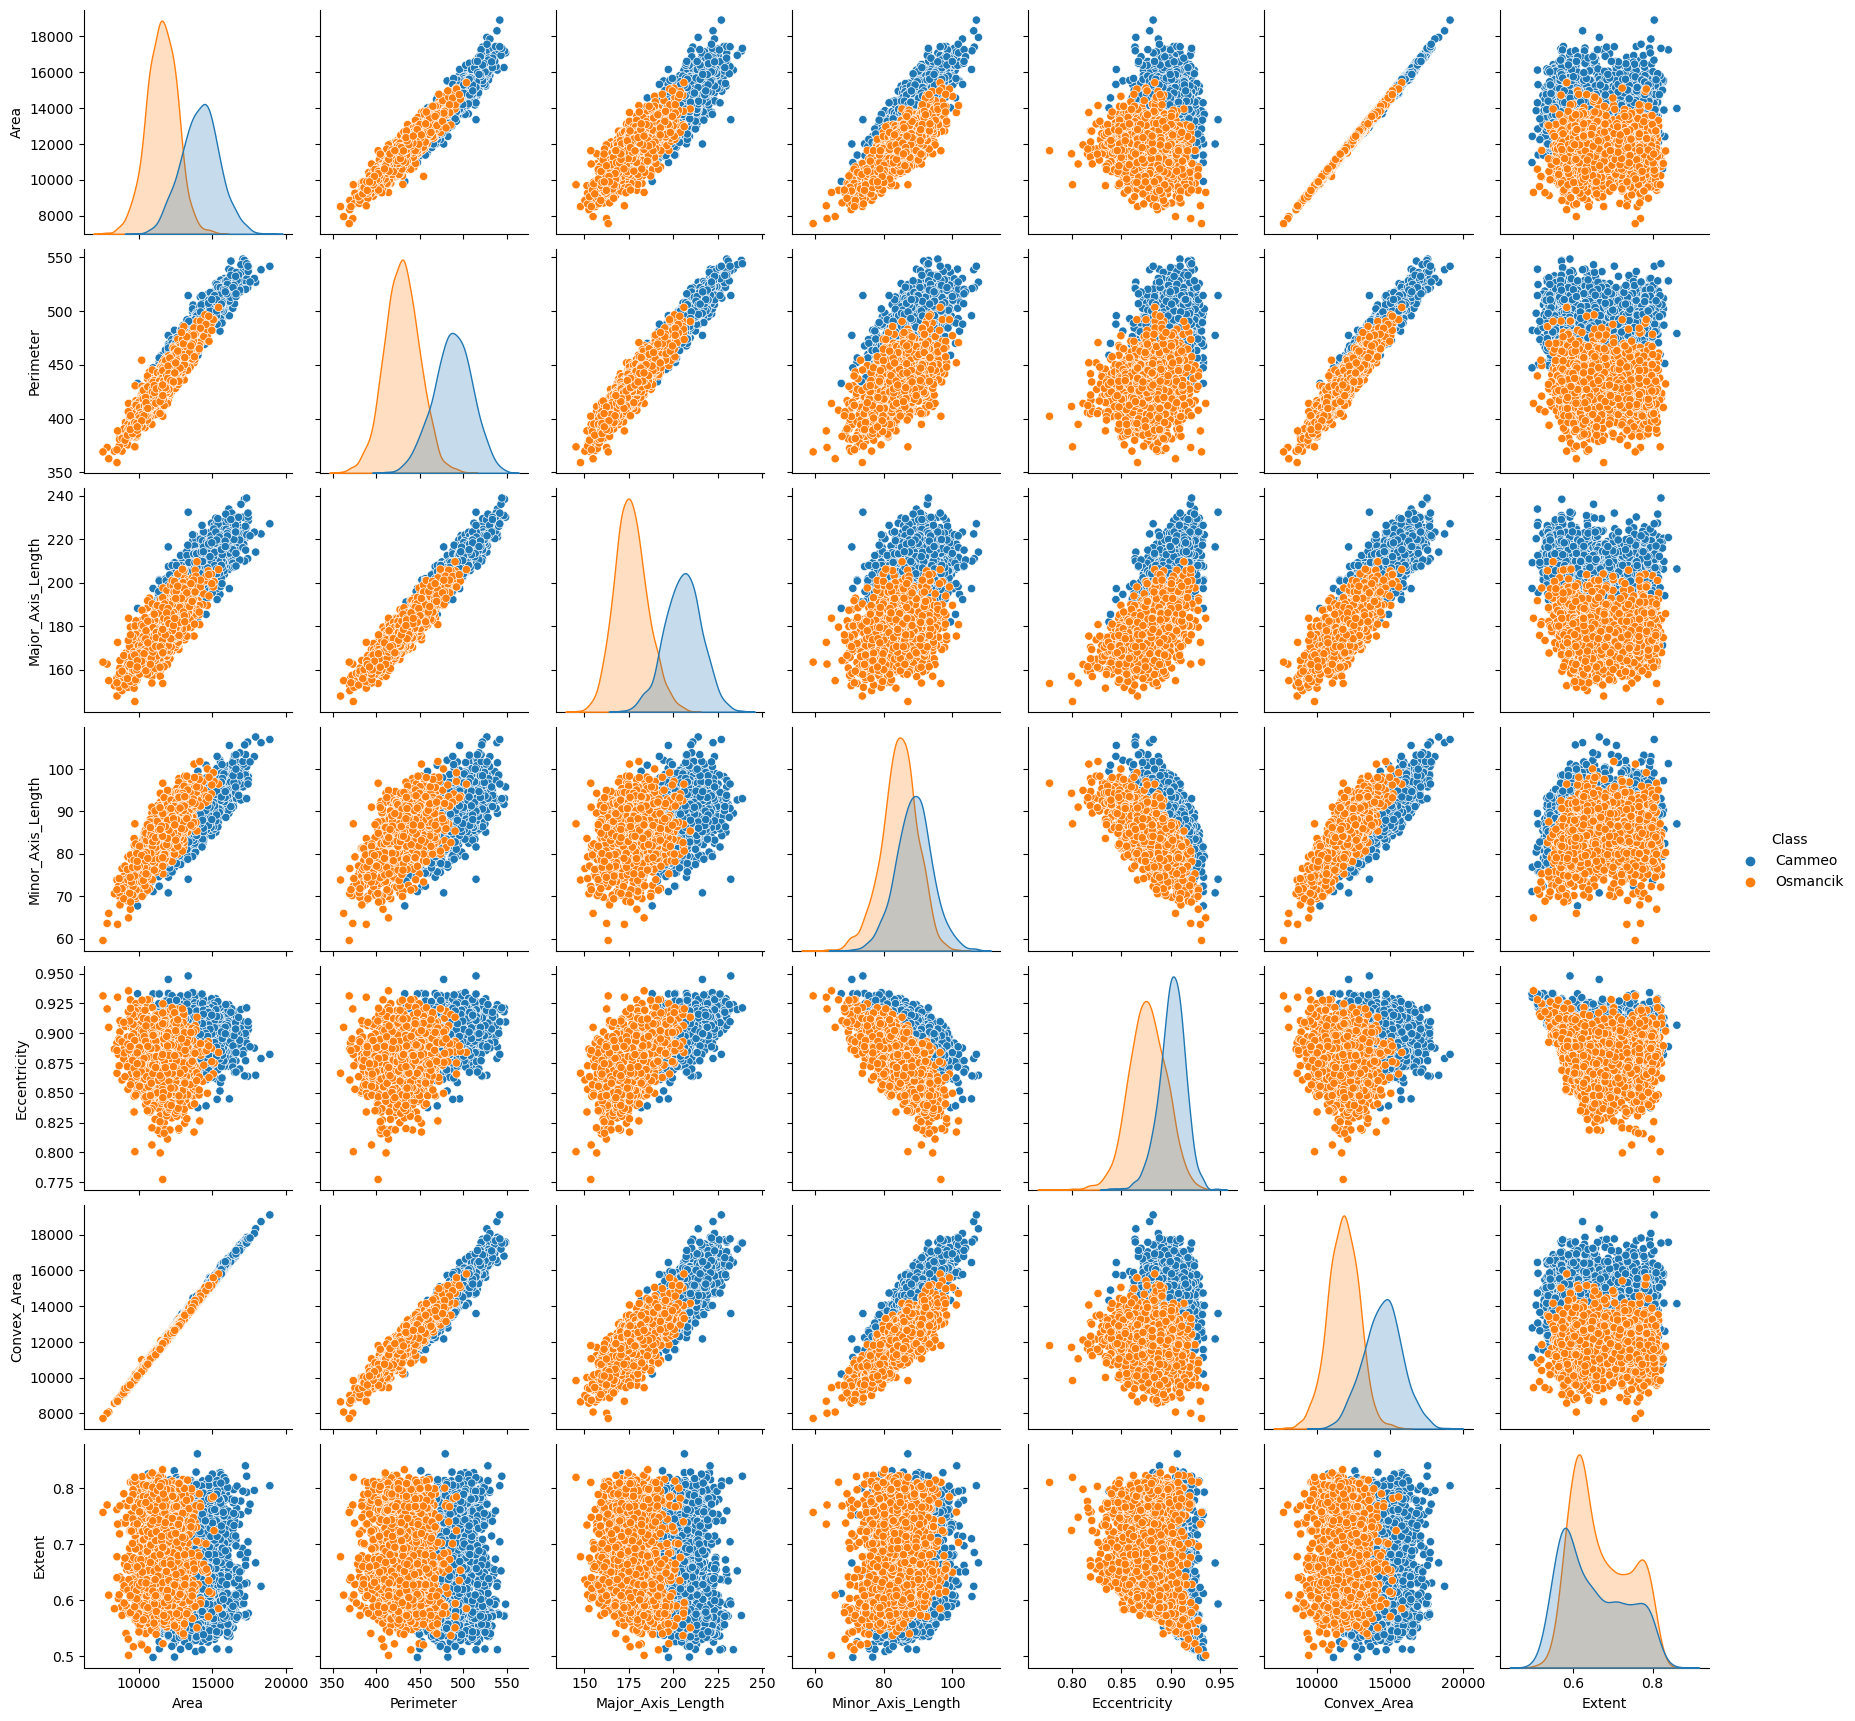

In [20]:
sns.pairplot(df, hue='Class')

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2857, 7), (953, 7), (2857, 1), (953, 1))

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

/Users/gregorysamek/anaconda3/envs/bt-nn/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

      Cammeo       0.93      0.90      0.91       430
    Osmancik       0.92      0.94      0.93       523

    accuracy                           0.92       953
   macro avg       0.93      0.92      0.92       953
weighted avg       0.92      0.92      0.92       953



In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9244491080797481

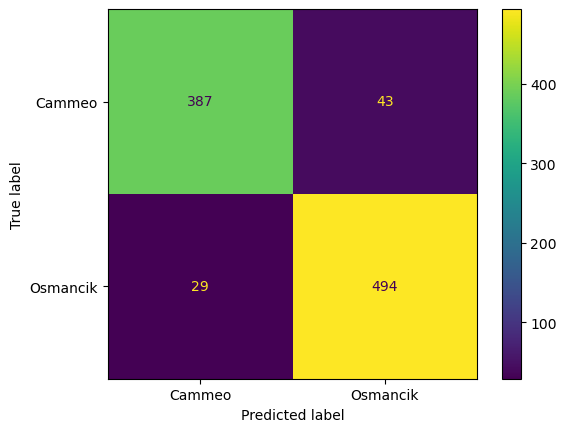

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()

In [29]:
pd.DataFrame(rf.feature_importances_, index=rice_cammeo_and_osmancik.variables.name[:-1], columns=['Importance']).sort_values(by='Importance', ascending=False)

,Importance
name,
Major_Axis_Length,0.274306
Perimeter,0.267271
Area,0.166223
Convex_Area,0.130050
Eccentricity,0.088801
Minor_Axis_Length,0.039235
Extent,0.034113


In [31]:
df['Class'].value_counts(normalize=True)

Class
Osmancik    0.572178
Cammeo      0.427822
Name: proportion, dtype: float64

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Cammeo       0.94      0.91      0.93       430
    Osmancik       0.93      0.95      0.94       523

    accuracy                           0.93       953
   macro avg       0.94      0.93      0.93       953
weighted avg       0.94      0.93      0.93       953



/Users/gregorysamek/anaconda3/envs/bt-nn/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


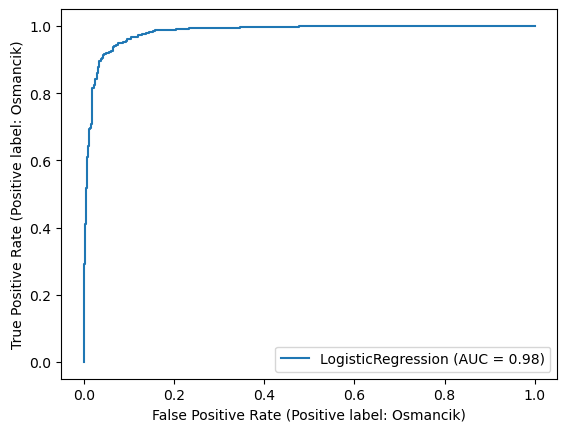

In [34]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(lr, X_test, y_test)

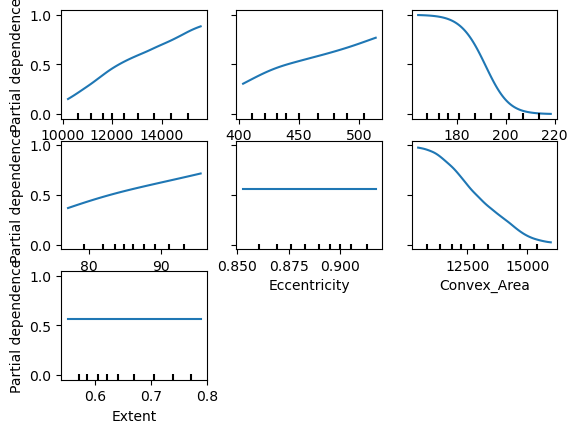

In [35]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(lr, X_test, features=rice_cammeo_and_osmancik.variables.name[:-1])

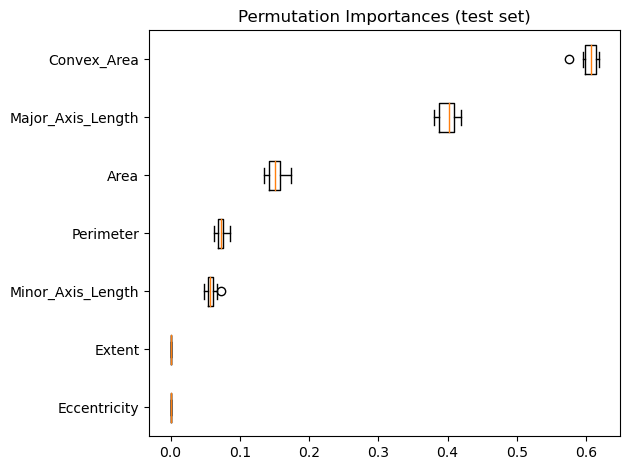

In [37]:
from sklearn.inspection import permutation_importance

result = permutation_importance(lr, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()

ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=rice_cammeo_and_osmancik.variables.name[:-1][sorted_idx])

ax.set_title("Permutation Importances (test set)")

fig.tight_layout()

plt.show()

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)

X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)

lr = LogisticRegression(random_state=42)

lr.fit(X_train_pca, y_train)

y_pred = lr.predict(X_test_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Cammeo       0.90      0.83      0.86       430
    Osmancik       0.87      0.92      0.89       523

    accuracy                           0.88       953
   macro avg       0.88      0.88      0.88       953
weighted avg       0.88      0.88      0.88       953



/Users/gregorysamek/anaconda3/envs/bt-nn/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
X_train_pca.shape, X_test_pca.shape

((2857, 1), (953, 1))

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_pca_scaled = scaler.fit_transform(X_train_pca)

X_test_pca_scaled = scaler.transform(X_test_pca)

lr = LogisticRegression(random_state=42)

lr.fit(X_train_pca_scaled, y_train)

y_pred = lr.predict(X_test_pca_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Cammeo       0.90      0.83      0.86       430
    Osmancik       0.87      0.92      0.89       523

    accuracy                           0.88       953
   macro avg       0.88      0.88      0.88       953
weighted avg       0.88      0.88      0.88       953



/Users/gregorysamek/anaconda3/envs/bt-nn/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: ylabel='Count'>

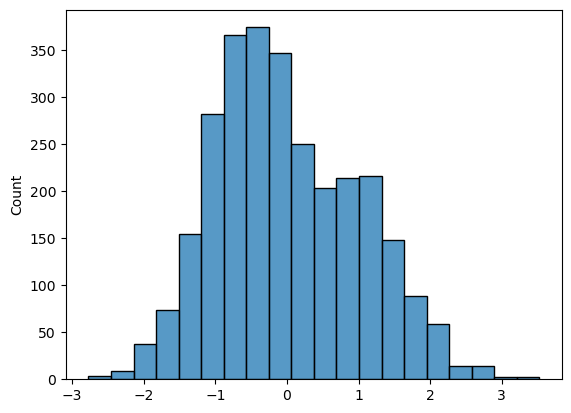

In [55]:
sns.histplot(X_train_pca_scaled[:,0], bins=20)

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)

X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)

lr = LogisticRegression(random_state=42)

lr.fit(X_train_pca, y_train)

y_pred = lr.predict(X_test_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Cammeo       0.91      0.84      0.87       430
    Osmancik       0.88      0.93      0.90       523

    accuracy                           0.89       953
   macro avg       0.89      0.88      0.89       953
weighted avg       0.89      0.89      0.89       953



/Users/gregorysamek/anaconda3/envs/bt-nn/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


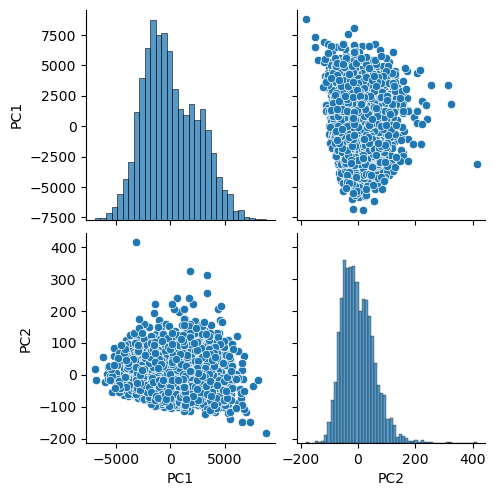

In [50]:
sns.pairplot(pd.DataFrame(X_train_pca, columns=['PC1', 'PC2']))

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Cammeo       0.91      0.84      0.87       430
    Osmancik       0.88      0.93      0.90       523

    accuracy                           0.89       953
   macro avg       0.89      0.89      0.89       953
weighted avg       0.89      0.89      0.89       953



/Users/gregorysamek/anaconda3/envs/bt-nn/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


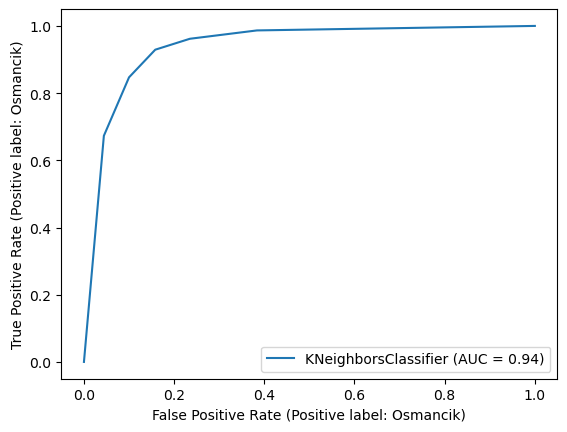

In [52]:
RocCurveDisplay.from_estimator(knn, X_test, y_test)

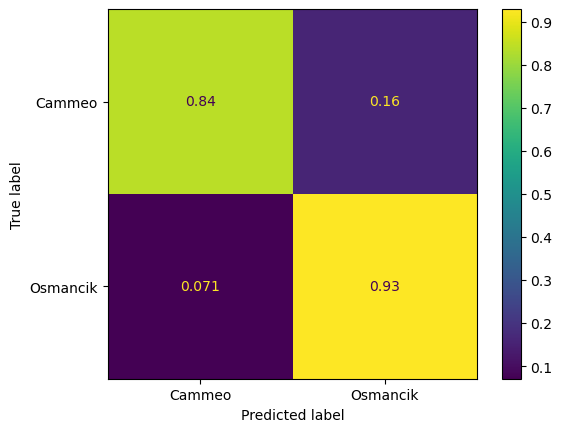

In [53]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, normalize='true')